# Lasso Regression

`Lasso(라쏘)` 회귀는 선형 회귀에 L1 규제를 추가한 회귀 모델이다. <br>
L1 규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것이다. <br>
이러한 특성 때문에 L1 규제는 `피처 선택 기능`으로도 불린다.

* 라쏘 회귀에서는 다음과 같은 함수를 최소화 하는 파라미터 $\omega$를 찾음

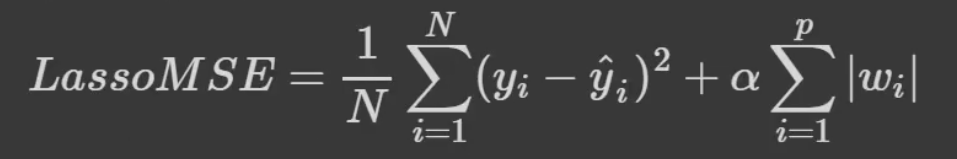

$\alpha$ : 사용자가 지정하는 매개변수 <br>
$\alpha$가 크면 규제 효과가 커지고, 작으면 규제 효과가 작아짐(Linear Regression과 동일한 형태가 된다)



## boston 주택 가격에 대한 Lasso 회귀

In [85]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

boston_df = pd.read_csv(
    filepath_or_buffer="http://lib.stat.cmu.edu/datasets/boston",
    delim_whitespace=True,
    skiprows=21,
    header=None,
)

columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

#Flatten all the values into a single long list and remove the nulls
values_w_nulls = boston_df.values.flatten()
all_values = values_w_nulls[~np.isnan(values_w_nulls)]

#Reshape the values to have 14 columns and make a new boston_df out of them
boston_df = pd.DataFrame(
    data = all_values.reshape(-1, len(columns)),
    columns = columns,
)

boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [86]:
X, y = boston_df.iloc[:, :-1], boston_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [87]:
model = Lasso(alpha=0.001) # Ridge는 alpha값 부여하여 규제한다고 했다.
model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [88]:
print("학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

''' 기존, 선형 회귀에 대한 점수
학습 데이터 점수 : 0.7513821044557794
평가 데이터 점수 : 0.6827140086307151
'''
''' Ridge 회귀에 대한 점수
학습 데이터 점수 : 0.723294750446188
평가 데이터 점수 : 0.7692269662856626
'''
# 평가 데이터 점수가 더 좋아졌다.

학습 데이터 점수 : 0.723300027049395
평가 데이터 점수 : 0.7734584303154595


' Ridge 회귀에 대한 점수\n학습 데이터 점수 : 0.723294750446188\n평가 데이터 점수 : 0.7692269662856626\n'

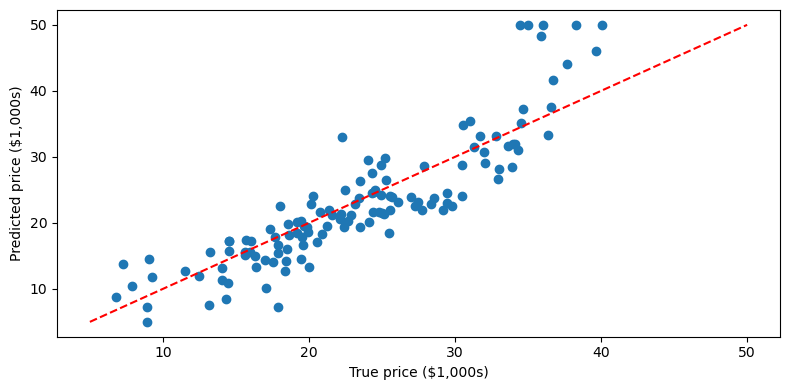

In [89]:
import matplotlib.pyplot as plt

def plot_boston_prices(expected, predicted) :
    plt.figure(figsize=(8, 4))
    plt.scatter(expected, predicted)
    plt.plot([5, 50], [5, 50], 'r--') # target(MEDV)의 max값 : 50, min값 : 5 니까 
    plt.xlabel('True price ($1,000s)')
    plt.ylabel('Predicted price ($1,000s)')
    plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_boston_prices(predicted, expected)

# 'r--'에 가까울수록 예측값과 실제값이 같다

## california 주택 가격에 대한 라쏘 회귀

In [90]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

X_train, X_test, y_train, y_test = train_test_split(california.data, california.target, test_size=0.2)

In [91]:
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)

Lasso(alpha=0.001)

In [92]:
print("학습 데이터 점수 : {}" .format(model.score(X_train, y_train)))
print("평가 데이터 점수 : {}" .format(model.score(X_test, y_test)))

''' 기존, 선형 회귀에 대한 점수
학습 데이터 점수 : 0.6042368591278031
훈련 데이터 점수 : 0.6131600824721322
'''
''' Ridge 회귀에 대한 점수
학습 데이터 점수 : 0.606252962119751
평가 데이터 점수 : 0.5921748215654452
'''
# 별로 달라지지 않았다.

학습 데이터 점수 : 0.6049055864395985
평가 데이터 점수 : 0.5989620642807041


' Ridge 회귀에 대한 점수\n학습 데이터 점수 : 0.606252962119751\n평가 데이터 점수 : 0.5921748215654452\n'

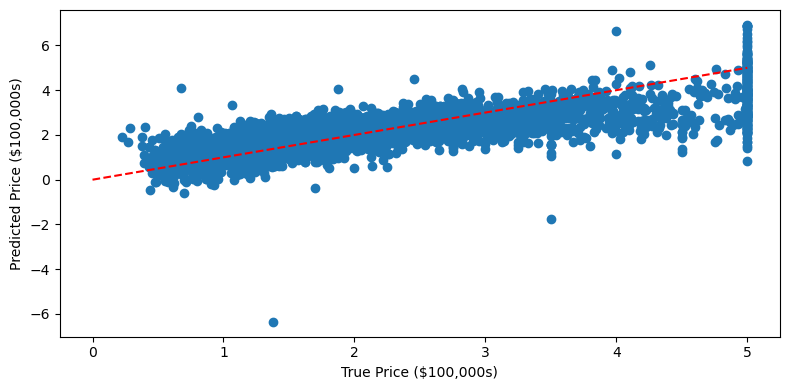

In [93]:
def plot_california_prices(expected, predicted) :
    plt.figure(figsize=(8, 4))
    plt.scatter(expected, predicted)
    plt.plot([0, 5], [0, 5], 'r--') # Target의 min값 : 0.149, max값 : 5.0
    plt.xlabel("True Price ($100,000s)")
    plt.ylabel("Predicted Price ($100,000s)")
    plt.tight_layout()

predicted = model.predict(X_test)
expected = y_test

plot_california_prices(expected, predicted)

# 3.5 ~ 5 100,000$ 부분에서의 miss가 많아 보임.